In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='max', ylabel='mean'>

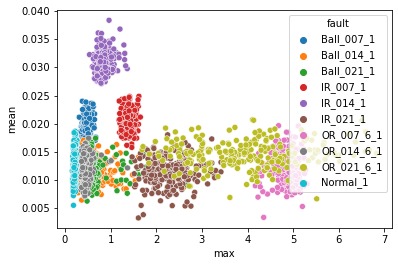

In [2]:
#reading data
data = pd.read_csv('feature_time_48k_2048_load_1.csv')

#data['fault'] = pd.Categorical(data['fault'])
#Divide the data into training data and test data
X=data.iloc[:,:9]
y=data.iloc[:,9]
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 332)
#data processing
scaler = StandardScaler()
train_scaled = scaler.fit_transform(x_train)
test_scaled = (x_test.values - scaler.mean_)/np.sqrt(scaler.var_)

sns.scatterplot(x="max",y="mean",hue="fault",data=data)


In [3]:
#lmport library of naive bayes
from sklearn.naive_bayes import GaussianNB

"""Sklearn Gaussian Naive Bayes Model
 Now we’ll import and instantiate the Gaussian Naive Bayes module from SKlearn GaussianNB. To fit the model, we may pass train_data_scaled and train_data['fault']
"""

#naive_bayes.GaussianNB
#Used when features are normally distributed (Josian)
classifier = GaussianNB()
classifier.fit(train_scaled, y_train)

GaussianNB()

In [4]:

"""Predictions of Naive bayes Model"""

#Training data on the naive bayes lalgorithm
train_predictions_NB = classifier.predict(train_scaled)
#Testing data on the naive bayes lalgorithm
test_predictions_NB = classifier.predict(test_scaled)
#confusion matrix of train and test by NB Model
train_cm_NB= confusion_matrix(y_train, train_predictions_NB)
test_cm_NB = confusion_matrix(y_test, test_predictions_NB)


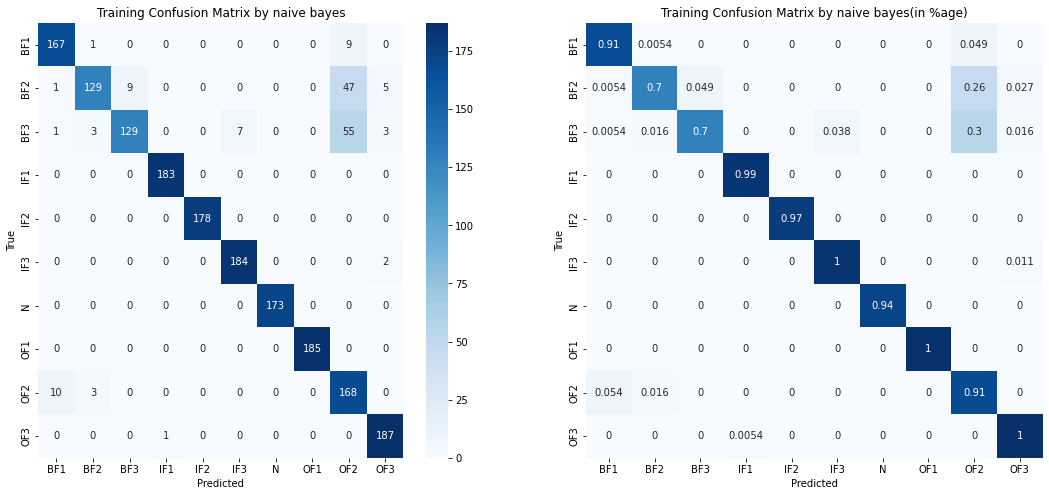

In [5]:
"""Plot of the train confusion matrix by Naive Bayes model.
Here the training of the data on the algorithm is shown and the data training ratio is shown
"""

fault_type = ['BF1','BF2','BF3','IF1','IF2','IF3','N','OF1','OF2','OF3']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_cm_NB, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix by naive bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_cm_NB/184, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix by naive bayes(in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

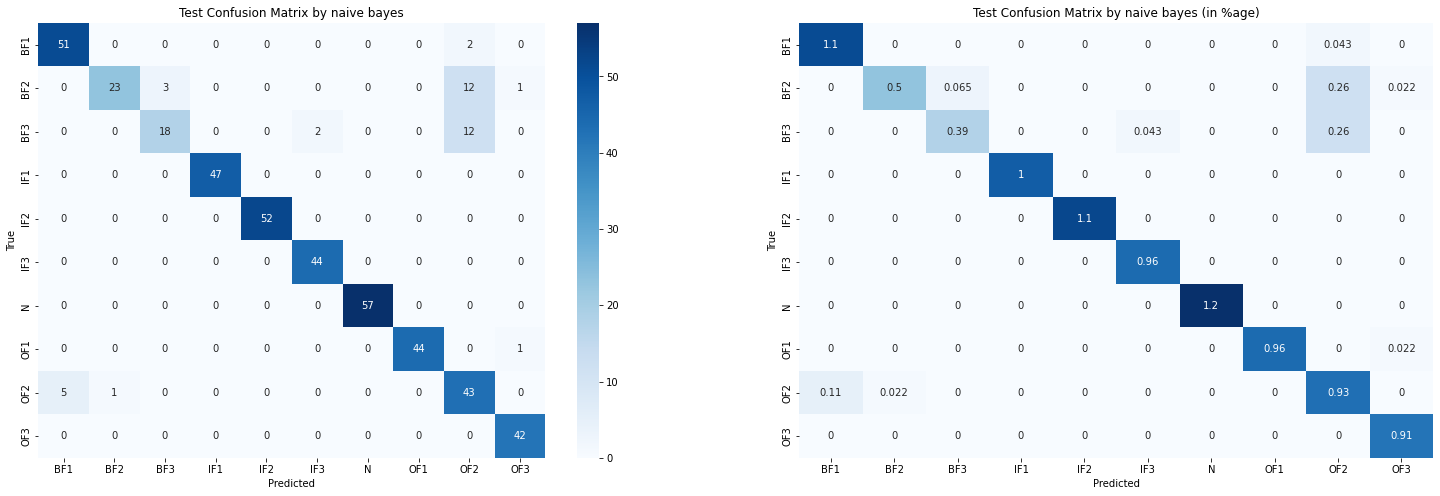

In [6]:
"""Plot of test Confusion Matrix by Naive Bayes model
Here the testing of the data on the algorithm is shown and the data testing ratio is shown
"""

plt.figure(2,figsize=(25,8))
plt.subplot(121)
sns.heatmap(test_cm_NB, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix by naive bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_cm_NB/46, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix by naive bayes (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [7]:
#print naive bayes algorithm accuracy test
test_accuracy_NB = accuracy_score(y_test, test_predictions_NB)
print("test accuracy Naive Bayes: ",test_accuracy_NB)



test accuracy Naive Bayes:  0.9152173913043479
